In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_img(img):
    if img.ndim == 3:  # 如果图像是彩色的
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.axis('off')  # 不显示坐标轴
    plt.show()

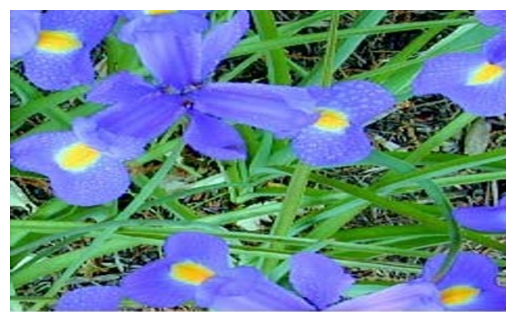

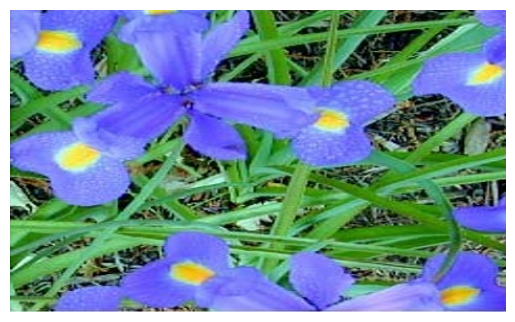

In [3]:
img = cv2.imread('./files/flowerx.png')
# 下面的None 本应该是输出图像的尺寸，但是因为后边我们设置了缩放因子
# 因此这里为None
res = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
#OR
# 直接设置输出图像的尺寸，所以不用设置缩放因子
height, width = img.shape[:2]
res = cv2.resize(img, (2 * width, 2 * height), interpolation=cv2.INTER_CUBIC)
while (1):  #注意缩进
    cv2.imshow('res', res)
    cv2.imshow('img', img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
show_img(res)
show_img(img)
cv2.destroyAllWindows()

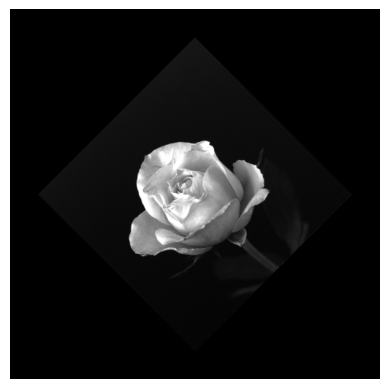

In [5]:
img = cv2.imread('./files/flower_black.png', 0)
rows, cols = img.shape
# 这里的第一个参数为旋转中心，第二个为旋转角度，第三个为旋转后的缩放因子
# 可以通过设置旋转中心，缩放因子，以及窗口大小来防止旋转后超出边界的问题
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 0.6)
# 第三个参数是输出图像的尺寸中心
dst = cv2.warpAffine(img, M, (cols, rows))
cv2.imwrite('before.png', dst)
cv2.imshow('after.png', dst)
show_img(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

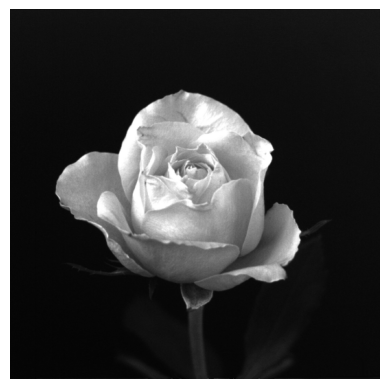

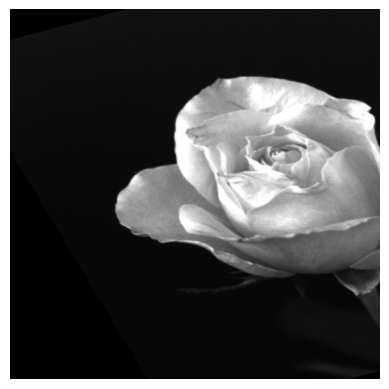

In [7]:
qimg = cv2.imread('./files/flower_black.png')
rows, cols, ch = img.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))
cv2.imshow('Input', img)
cv2.imshow('Output', dst)
show_img(img)
show_img(dst)
cv2.imwrite('getAffineTransformImg.jpg', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
img = cv2.imread('./files/news.png')
rows, cols, ch = img.shape
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (200, 200))
cv2.imshow('Input', img)
cv2.imshow('Output', dst)
show_img(img)
show_img(dst)
cv2.imwrite('getPerspectiveTransformImg.jpg', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [6]:
# 当鼠标按下时变为True
ix1, iy1 = -1, -1
ix2, iy2 = -1, -1
ix3, iy3 = -1, -1
ix4, iy4 = -1, -1


# 创建回调函数
def draw_circle(event, x, y, flags, param):
    global ix1, iy1, ix2, iy2, ix3, iy3, ix4, iy4
    # 当按下左键是返回位置坐标
    if event == cv2.EVENT_LBUTTONDOWN:
        if ix1 == -1:
            ix1, iy1 = x, y
            cv2.circle(img, (x, y), 2, (255, 255, 255), -1)
        elif ix2 == -1:
            ix2, iy2 = x, y
            cv2.circle(img, (x, y), 2, (255, 255, 255), -1)
        elif ix3 == -1:
            ix3, iy3 = x, y
            cv2.circle(img, (x, y), 2, (255, 255, 255), -1)
        elif ix4 == -1:
            ix4, iy4 = x, y
            cv2.circle(img, (x, y), 2, (255, 255, 255), -1)


img = cv2.imread('./files/news.png')
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)
while 1:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if ix4 != -1:
        break
cv2.imshow('image', img)
#cv2.getAffineTransform 会创建一个2x3 的矩阵，最后这个矩阵会被传给函数cv2.warpAffine。
src_point = np.float32([[ix1, iy1], [ix2, iy2], [ix3, iy3], [ix4, iy4]])
dst_point = np.float32([[0, 0], [0, 300], [300, 300], [300, 0]])
h = cv2.getPerspectiveTransform(src_point, dst_point)
#通过一一对应的点，计算映射矩阵，进行变换
res = cv2.warpPerspective(img, h, (300, 300))
#cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst
#src：输入图像
# M：变换矩阵 dsize：目标图像shape flags：插值方式，interpolation方法INTER_LINEAR或INTER_NEAREST
#borderMode：边界补偿方式，BORDER_CONSTANT or BORDER_REPLICATE
#borderValue：边界补偿大小，常值，默认为0
cv2.imshow('output', res)
cv2.waitKey(0)
cv2.destroyAllWindows()